# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import PolynomialFeatures

### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [3]:
# URL исходного датасета
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# Загрузка данных
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [4]:
# Обработка данных
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [5]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_degree = 0
best_r2 = float('-inf')

for degree in range(1, 11):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Обучение линейной регрессии
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Предсказание и вычисление R^2
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    
    # Обновление лучшей степени и R^2
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

# Вывод лучшей степени полинома и соответствующего R^2
print(f"Best Degree: {best_degree}")
print(f"Best R^2 Score: {best_r2:.2f}")

# Обучение лучшей модели и выполнение предсказания
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)
best_y_pred = best_model.predict(X_test_poly)

Best Degree: 2
Best R^2 Score: 0.81


- 1. Лучшая Степень Полинома:
Наилучший результат ($R^2$ Score: 0.81) был достигнут с полиномом второй степени. Это означает, что добавление полиномиальных признаков второй степени помогло улучшить предсказательную способность модели по сравнению с линейной регрессией (полином первой степени).


- 2. Качество Модели:
Значение равное 0.81 указывает на то, что 81% вариации в целевой переменной (цена на жилье) может быть объяснено признаками датасета при использовании полиномиальной регрессии второй степени. Это довольно высокий показатель, который говорит о хорошей предсказательной способности модели.


- 3. Выбор Модели:
Полиномиальная регрессия с степенью 2 является подходящей моделью для этой задачи на основе проведенного анализа. Однако стоит быть осторожным с использованием полиномов более высоких степеней, поскольку они могут привести к переобучению, особенно на небольших датасетах.


- 4. Дальнейшие Шаги:
Для дополнительного улучшения модели можно рассмотреть другие техники, такие как регуляризация, или использование других алгоритмов машинного обучения.
Также важно провести дополнительную проверку модели с использованием других метрик качества и на новых данных, чтобы убедиться в ее робастности и надежности.

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

Допустим, мы выберем один признак (например, RM - среднее количество комнат на жилище) для визуализации.

In [6]:
class LinearRegressionAnalytical:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем столбец с единицами
        self.w = inv(X.T.dot(X)).dot(X.T).dot(y)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем столбец с единицами
        return X.dot(self.w)

In [7]:
# Используем один признак (RM) для визуализации
X_boston = X[:, 5].reshape(-1, 1)  # выберем признак RM
y_boston = y

# Обучим модель
model = LinearRegressionAnalytical()
model.fit(X_boston, y_boston)
predictions = model.predict(X_boston)

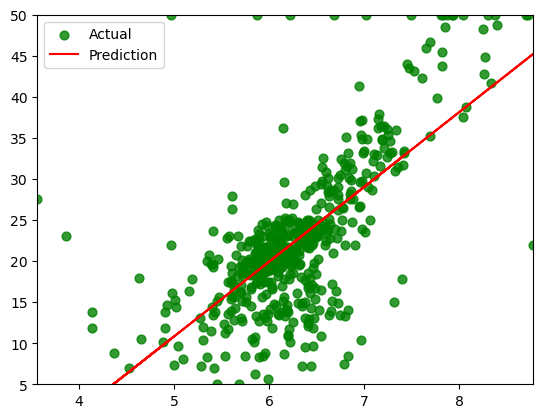

In [8]:
# настройка графика
plt.xlim(X_boston.min(), X_boston.max())
plt.ylim(y_boston.min(), y_boston.max())
# рисуем исходные точки
plt.scatter(X_boston, y_boston, 40, 'g', 'o', alpha=0.8, label="Actual")
# предсказание модели
plt.plot(X_boston, predictions, color="red", label="Prediction")
plt.legend()

plt.show()

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [9]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на обучающей выборке
model = LinearRegressionAnalytical()
model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred_valid = model.predict(X_valid)

# Вычисление R^2 на валидационной выборке
r2_before_z_transform = r2_score(y_valid, y_pred_valid)

In [10]:
# Применение z-преобразования
scaler = StandardScaler()
X_train_z_transformed = scaler.fit_transform(X_train)
X_valid_z_transformed = scaler.transform(X_valid)

In [11]:
# Обучение модели на стандартизированной обучающей выборке
model.fit(X_train_z_transformed, y_train)

# Предсказание на стандартизированной валидационной выборке
y_pred_valid_z_transformed = model.predict(X_valid_z_transformed)

# Вычисление R^2 на стандартизированной валидационной выборке
r2_after_z_transform = r2_score(y_valid, y_pred_valid_z_transformed)

r2_before_z_transform, r2_after_z_transform

(0.6687594935356206, 0.6687594935356318)

1. До z-преобразования: $R^2$=0.6688
2. После z-преобразования: $R^2$=0.6688

На основе этих результатов можно сделать следующие выводы:

1. Стабильность Модели: Значение $R^2$ осталось практически неизменным после применения z-преобразования. Это указывает на то, что линейная регрессия, основанная на аналитическом методе вычисления коэффициентов, является стабильной и не чувствительной к масштабу признаков.
2. Значимость Z-преобразования: Для некоторых алгоритмов машинного обучения стандартизация данных может быть критически важной для достижения хорошей производительности. Однако в случае аналитической линейной регрессии z-преобразование не привело к значительному улучшению или ухудшению результатов.
3. Общая Производительность: Значение $R^2$ равное 0.6688 указывает на то, что примерно 66.88% дисперсии целевой переменной объясняется моделью. Это довольно хороший результат, учитывая простоту модели.